<a href="https://colab.research.google.com/github/jumarques03/GS_SERS/blob/main/GS_SERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Aluna:*** Júlia Souza Marques
### ***RM:*** 565010

# ***Introdução***

O futuro do trabalho e a sustentabilidade energética estão conectados. À medida que adotamos novas tecnologias em nosso dia a dia profissional, precisamos garantir que elas sejam eficientes e não criem novos desperdícios.

Este trabalho mergulha nessa interseção, usando como caso de estudo o ecossistema de recarga de veículos elétricos (EVs). Embora essenciais para um futuro limpo, os EVs trazem novos desafios. Analisando dados reais, identificamos dois problemas centrais de desperdício: picos de demanda que sobrecarregam a rede em horários comerciais e o uso ineficiente da infraestrutura, com carros ocupando vagas desnecessariamente.

Como solução, propomos um sistema de carregamento inteligente baseado na análise de dados. Demonstramos que essa otimização não é apenas técnica, ela é a força motriz para a criação de novas profissões do futuro, como o Analista de Demanda de Eletromobilidade, provando que a inovação sustentável e os novos empregos caminham juntos.

# ***Objetivo***

Identificar desperdícios de energia e o uso ineficiente da infraestrutura das estações de carregamento, com o objetivo de propor uma solução que melhore o fluxo e a demanda de energia. Essa solução será baseada na análise dos dados e demonstrará como é possível construir empregos do futuro e promover a sustentabilidade.


Dataset utilizado: https://www.kaggle.com/datasets/venkatsairo4899/ev-charging-station-usage-of-california-city

# ***Análise exploratória dos dados***

In [35]:
# Importando o dataset
import pandas as pd

df = pd.read_csv("/content/EVChargingStationUsage.csv", sep=',', low_memory=False)
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [36]:
# Obtendo informações sobre o dataset e identificando colunas relevantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [37]:
# Removendo colunas que não serão usadas para a análise
colunas_a_remover = ['Station Name', 'MAC Address', 'Org Name','Start Time Zone', 'End Time Zone', 'Transaction Date (Pacific Time)','Port Type', 'Port Number', 'Plug Type','EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code', 'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By','Plug In Event Id', 'Driver Postal Code', 'User ID', 'County','System S/N', 'Model Number']

df.drop(colunas_a_remover, axis=1, inplace=True)

In [38]:
# Convertendo as colunas para os tipos corretos
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], errors='coerce')

df['Total Duration (hh:mm:ss)'] = pd.to_timedelta(df['Total Duration (hh:mm:ss)'], errors='coerce')
df['Charging Time (hh:mm:ss)'] = pd.to_timedelta(df['Charging Time (hh:mm:ss)'], errors='coerce')

In [39]:
# Verificando se há valores nulos nas colunas selecionadas.
df.isnull().sum()

,0
Start Date,0
End Date,40
Total Duration (hh:mm:ss),0
Charging Time (hh:mm:ss),0
Energy (kWh),0
GHG Savings (kg),0
Gasoline Savings (gallons),0


In [40]:
# Removendo valores nulos
df.dropna(subset=['End Date'], inplace=True)

In [41]:
# Verificando se os valores foram removidos
df.isnull().sum()

,0
Start Date,0
End Date,0
Total Duration (hh:mm:ss),0
Charging Time (hh:mm:ss),0
Energy (kWh),0
GHG Savings (kg),0
Gasoline Savings (gallons),0


In [42]:
# Verificando se as alterações foram concluídas com sucesso
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259375 entries, 0 to 259414
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   Start Date                  259375 non-null  datetime64[ns] 
 1   End Date                    259375 non-null  datetime64[ns] 
 2   Total Duration (hh:mm:ss)   259375 non-null  timedelta64[ns]
 3   Charging Time (hh:mm:ss)    259375 non-null  timedelta64[ns]
 4   Energy (kWh)                259375 non-null  float64        
 5   GHG Savings (kg)            259375 non-null  float64        
 6   Gasoline Savings (gallons)  259375 non-null  float64        
dtypes: datetime64[ns](2), float64(3), timedelta64[ns](2)
memory usage: 15.8 MB


# ***Identificando picos de demanda***

In [43]:
# Pegando somente as horas da coluna 'Start Date'
df['Start Hour'] = df['Start Date'].dt.hour

In [44]:
# Agrupando para identifica picos de demanda
picos_de_demanda = df.groupby('Start Hour')['Energy (kWh)'].sum().reset_index()

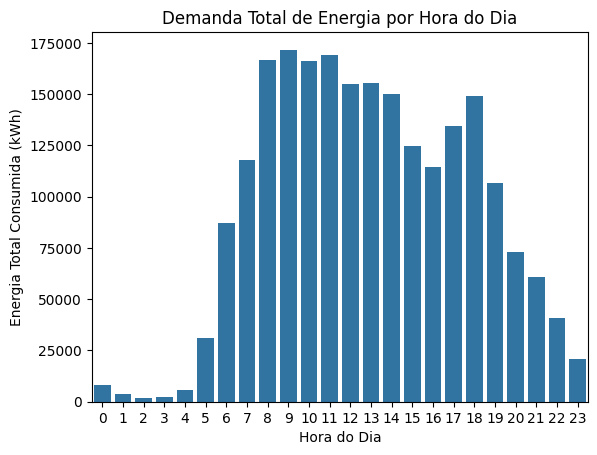

In [45]:
# Plotando gráfico com os picos de demanda
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=picos_de_demanda, x='Start Hour', y='Energy (kWh)')
plt.title('Demanda Total de Energia por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Energia Total Consumida (kWh)')
plt.show()

# ***Identificando mal uso da infraestrutura***

In [46]:
# Obtendo informações
uso_a_mais_infra = df['Total Duration (hh:mm:ss)'] - df['Charging Time (hh:mm:ss)']
df['Wasted_Time'] = uso_a_mais_infra

In [47]:
# Obtendo horas excedentes
media_mal_uso_infra = df.groupby('Start Hour')['Wasted_Time'].mean().reset_index()

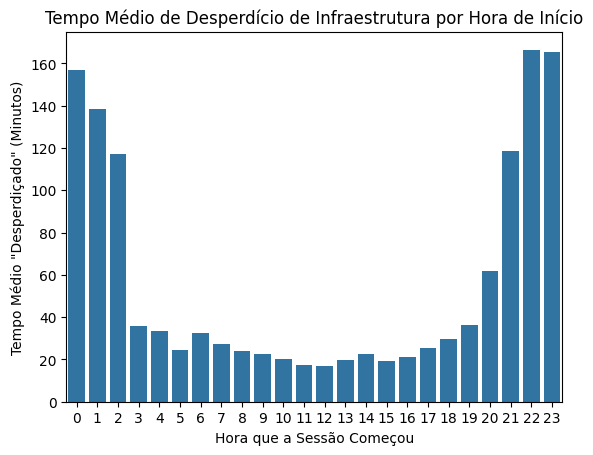

In [48]:
# Plotando o gráfico
media_mal_uso_infra['Wasted_Time_Minutes'] = media_mal_uso_infra['Wasted_Time'].dt.total_seconds() / 60

sns.barplot(data=media_mal_uso_infra,x='Start Hour',y='Wasted_Time_Minutes')
plt.title('Tempo Médio de Desperdício de Infraestrutura por Hora de Início')
plt.xlabel('Hora que a Sessão Começou')
plt.ylabel('Tempo Médio "Desperdiçado" (Minutos)')
plt.show()

# ***Insights extraídos após análise dos gráficos***

A análise dos dados revela dois padrões distintos de uso. Primeiramente, temos um pico de demanda de energia que começa às 8h e vai até 18h. Uma possibilidade que explica esse pico de consumo é o período de trabalho das pessoas, muitas podem aproveitar para carregar seu carro enquanto estão trabalhando em pontos de carregamento presentes no trabalho ou próximos a ele.


Em relação ao mal uso da infraestrutura, o maior desperdício está concentrado entre 22h e 2h. Isso indica, provavelmente, que muitas pessoas deixam seus carros carregando durante a noite, mesmo sem estar com pouca bateria, e somente os desconectam ao amanhecer.
Se analisarmos o desperdício da infraestrutura nos horários de pico (8h-18h), podemos concluir que o problema da ociosidade, embora menor que o noturno, ainda existe: em média, os motoristas desperdiçam de 20 a 40 minutos de infraestrutura durante o dia.


# ***Solução proposta***

Uma possível solução para a otimização do consumo de energia e da rotatividade nessas estações de carregamento é a adoção de um projeto de carregamento inteligente. Através desses insights coletados e outros, o projeto visaria, justamente, fazer essa otimização tanto no consumo quanto na rotatividade. Para obter um maior engajamento das pessoas, o projeto enviaria notificações caso o tempo de carregamento fosse concluído e o carro continuasse na vaga e, também, notificações aconselhando o carregamento dos carros em horários menos disputados para evitar a sobrecarga do sistema e consumo. Além disso, aplicaria taxas caso a pessoa deixasse o carro ocupando o espaço muito tempo a mais que o necessário. Também haveria profissionais especializados em carros elétricos nas estações para conscientizar as pessoas em relação ao desperdício, otimização e sustentabilidade.

Este projeto, por si só, não se cria sozinho, ele é feito de pessoas para pessoas. Para isso acontecer, a contratação de profissionais do futuro é fundamental. Funções como Analista de Demanda de Eletromobilidade, Técnico Especializado em Carregadores Inteligentes e Gerente de Demanda Energética em Estações de Carregamento poderiam ser reinventadas ou até mesmo criadas para que o projeto se realizasse com sucesso. Assim, essa solução conseguiria contribuir para o futuro das profissões e, ao mesmo tempo, promover a sustentabilidade energética.


# ***Estimativa de ganhos ambientais e econômicos***

A implementação da solução de carregamento inteligente, baseada nos problemas identificados nos gráficos, geraria os seguintes ganhos:

### 1. Ganho Econômico (Eficiência da Infraestrutura)

* **Problema:** O Gráfico 2 ("Tempo Médio de Desperdício") mostra que, em horários de pico, os motoristas desperdiçam em média de 20 a 40 minutos com o carro parado na vaga após o carregamento.
* **Ganho Estimado:** Ao aplicar o sistema de notificações e taxas, esse tempo seria reduzido. A estimativa é que essa medida aumentaria a rotatividade  de veículos nas vagas durante o dia. Isso representaria um ganho econômico, pois a mesma infraestrutura poderia atender mais clientes e gerar mais receita, sem a necessidade de investimentos em novas estações.

### 2. Ganho Ambiental e Econômico (Otimização da Rede)

* **Problema:** O Gráfico 1 ("Demanda Total de Energia") mostra um pico de consumo concentrado no horário comercial (8h-18h), o que sobrecarrega a rede elétrica da cidade.
* **Ganho Estimado:** Ao incentivar o carregamento em horários de menor demanda (como o vale identificado às 15h), uniformiza-se a curva de consumo. Isso reduz a necessidade de acionar usinas de energia de pico (muitas vezes movidas a combustíveis fósseis), reduzindo a pegada de carbono do carregamento. Além disso,a energia em horários de pico é mais cara. Reduzir a demanda máxima diminui os custos de operação para a estação de carregamento e para a distribuidora de energia, tornando o sistema mais sustentável financeiramente.